<a href="https://colab.research.google.com/github/anmoladh/git/blob/master/Modelinferencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import joblib

# Load the trained model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('feature_scaler.pkl')

print("Model and scaler loaded successfully.")


Model and scaler loaded successfully.


In [2]:
import pandas as pd
# Load the network log data
logs = pd.read_csv('/content/synthetic_network_logs_vscode.csv')

print("Logs loaded successfully.")
display(logs.head())

Logs loaded successfully.


,timestamp,source_ip,destination_ip,source_port,destination_port,protocol,packet_size,duration,num_packets,num_bytes,response_time,anomaly_score,dns_requests,http_requests,data_exfiltration,attack_type
0,2025-02-10 10:27:10.389906,192.168.16.47,10.0.199.225,60582,80,ICMP,113,2.99,6,3944,99.39,0.14,0,7,0,Normal
1,2025-02-10 10:27:22.389906,192.168.54.253,10.0.177.153,54345,80,UDP,918,3.42,146,11985,428.59,0.53,37,12,0,DDoS
2,2025-02-10 10:27:12.389906,192.168.51.72,10.0.64.63,20587,80,UDP,772,0.49,16,4440,297.37,0.33,7,2,0,Normal
3,2025-02-10 10:27:02.389906,192.168.66.197,10.0.12.130,38819,80,ICMP,840,2.73,49,2887,451.17,0.16,5,9,0,Normal
4,2025-02-10 10:27:10.389906,192.168.202.11,10.0.213.84,1906,80,UDP,1285,0.69,185,9494,486.96,0.66,12,32,1,DDoS


In [3]:
# Define the expected feature columns based on training data
expected_columns = [
    'source_port', 'destination_port', 'packet_size', 'duration', 'num_packets',
    'num_bytes', 'response_time', 'anomaly_score', 'dns_requests', 'http_requests',
    'data_exfiltration'
]

# Ensure all expected columns are present (fill missing with 0)
for col in expected_columns:
    if col not in logs.columns:
        logs[col] = 0

# Reorder columns to match model input order
log_data = logs[expected_columns]

# Scale the data using the trained scaler
scaled_log_data = scaler.transform(log_data)


In [4]:
# Predict anomalies using the trained model
predictions = model.predict(scaled_log_data)

# Map predictions to attack types
attack_labels = {0: 'Normal', 1: 'DDoS', 2: 'Ping Flood'}  # Modify as needed
logs['Prediction'] = [attack_labels.get(pred, 'Unknown') for pred in predictions]

# Display a few predictions
display(logs[['timestamp', 'source_ip', 'destination_ip', 'Prediction']].head(10))


,timestamp,source_ip,destination_ip,Prediction
0,2025-02-10 10:27:10.389906,192.168.16.47,10.0.199.225,DDoS
1,2025-02-10 10:27:22.389906,192.168.54.253,10.0.177.153,DDoS
2,2025-02-10 10:27:12.389906,192.168.51.72,10.0.64.63,DDoS
3,2025-02-10 10:27:02.389906,192.168.66.197,10.0.12.130,DDoS
4,2025-02-10 10:27:10.389906,192.168.202.11,10.0.213.84,DDoS
5,2025-02-10 10:27:06.389906,192.168.64.107,10.0.115.215,DDoS
6,2025-02-10 10:27:00.389906,192.168.229.145,10.0.50.161,DDoS
7,2025-02-10 10:27:14.389906,192.168.104.163,10.0.240.182,DDoS
8,2025-02-10 10:27:13.389906,192.168.245.59,10.0.132.131,DDoS
9,2025-02-10 10:27:30.389906,192.168.127.76,10.0.38.129,DDoS


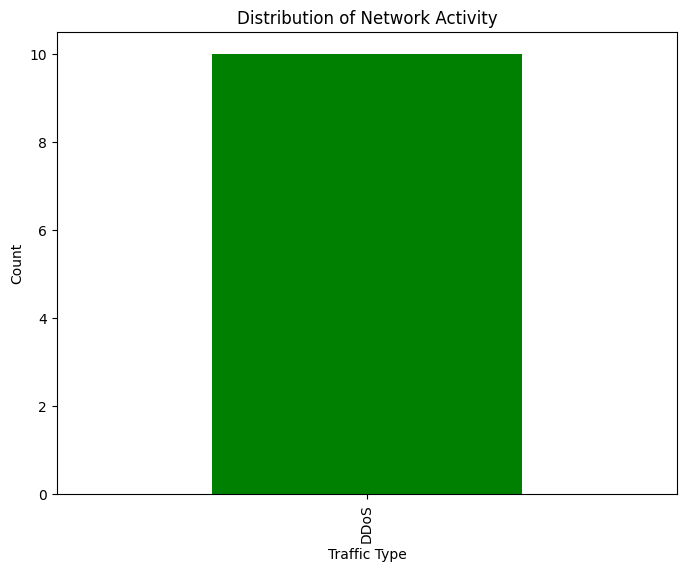

In [5]:
import matplotlib.pyplot as plt

# Count predictions
counts = logs['Prediction'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Distribution of Network Activity')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()


In [6]:
import plotly.express as px

# Plot timeline of anomalies using timestamps and anomaly scores
fig = px.scatter(logs, x='timestamp', y='anomaly_score', color='Prediction',
                 title='Anomalies Over Time', labels={'timestamp': 'Time', 'anomaly_score': 'Anomaly Score'})
fig.show()


In [7]:
# Trigger alerts for anomalies
for index, row in logs.iterrows():
    if row['Prediction'] != 'Normal':
        print(f"🚨 ALERT: {row['Prediction']} detected!")
        print(f"Timestamp: {row['timestamp']}, Source IP: {row['source_ip']}, Destination IP: {row['destination_ip']}")


🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:10.389906, Source IP: 192.168.16.47, Destination IP: 10.0.199.225
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:22.389906, Source IP: 192.168.54.253, Destination IP: 10.0.177.153
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:12.389906, Source IP: 192.168.51.72, Destination IP: 10.0.64.63
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:02.389906, Source IP: 192.168.66.197, Destination IP: 10.0.12.130
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:10.389906, Source IP: 192.168.202.11, Destination IP: 10.0.213.84
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:06.389906, Source IP: 192.168.64.107, Destination IP: 10.0.115.215
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:00.389906, Source IP: 192.168.229.145, Destination IP: 10.0.50.161
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:14.389906, Source IP: 192.168.104.163, Destination IP: 10.0.240.182
🚨 ALERT: DDoS detected!
Timestamp: 2025-02-10 10:27:1